In [2]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

In [3]:
df

,course_name,duration
0,Data Science,2
1,Machine Learning,3
2,Big Data,6
3,Data Engineer,4


Q1. Write a code to print the data present in the second row of the dataframe.

In [4]:
df['duration']

0    2
1    3
2    6
3    4
Name: duration, dtype: int64

Q2. What is the difference between the functions loc and iloc in pandas.DataFrame?


In pandas, loc and iloc are both used for indexing and selecting data from a DataFrame, but they differ in the way they specify and interpret the indices.

loc (label-based indexing):

It is primarily used for selection by label (row index and column names).
You specify the row labels and column names to retrieve data.
The syntax is df.loc[row_label, column_label].
It includes the end index in the selection.

In [7]:
df.loc[0:2,['course_name']]

,course_name
0,Data Science
1,Machine Learning
2,Big Data


In [11]:
df.iloc[0:2,[0]]   #.iloc requires numeric indexers

,course_name
0,Data Science
1,Machine Learning


Q3. Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df
then find the output for both new_df.loc[2] and new_df.iloc[2].ices)

the difference lies in whether you're using labels or integer positions to specify the rows and columns. If the DataFrame has integer index labels, using .loc and .iloc may produce the same output, but with non-integer index labels, they can lead to different results.

In [32]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

reindex = [3,0,1,2]
df1=df1.reindex(index=reindex)

In [33]:
df1.loc[2,['column_2','column_3']]

column_2    0.670891
column_3    0.211443
Name: 2, dtype: float64

In [34]:
df1.iloc[2,[1,2]]

column_2    0.108243
column_3    0.566194
Name: 1, dtype: float64

Q4. Write a code to find the following statistical measurements for the above dataframe df1:
(i) mean of each and every column present in the dataframe.
(ii) standard deviation of column, ‘column_2’

In [35]:
df1.mean()

column_1    0.062635
column_2    0.485145
column_3    0.446173
column_4    0.480205
column_5    0.568867
column_6    0.513407
dtype: float64

In [36]:
df1['column_2'].std()

0.32641737654681247

Q5. Replace the data present in the second row of column, ‘column_2’ by a string variable then find the
mean of column, column_2.
If you are getting errors in executing it then explain why.
[Hint: To replace the data use df1.loc[] and equate this to string data of your choice.]

In [48]:
df1.loc[2,['column_2']]='String'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\3861536269.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'String' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[2,['column_2']]='String'


In [52]:
try :
    df1.mean()
except Exception as e:
    print(e)


unsupported operand type(s) for +: 'float' and 'str'


In this example, the data in the second row of 'column_2' is replaced with the string 'Hello'. However, when you attempt to calculate the mean of 'column_2', it will result in an error because you cannot calculate the mean of a column containing string values.
If you want to replace the data with a string and still calculate the mean, you need to convert the column to a numeric type after replacing the string. For instance, you could use pd.to_numeric

In [53]:
df1['column_2'] = pd.to_numeric(df1['column_2'], errors='coerce')
#In this case, errors='coerce' will replace non-numeric values with NaN, and then you can calculate the mean without errors.

In [55]:
df1.mean()

column_1    0.658134
column_2    0.690548
column_3    0.585424
column_4    0.694397
column_5    0.426887
column_6    0.644720
dtype: float64

Q6. What do you understand about the windows function in pandas and list the types of windows
functions?

In pandas, the windows functions are used for performing operations on a specified window of data in a pandas DataFrame or Series. These functions are particularly useful for tasks like calculating rolling statistics, moving averages, and other time-based or rolling computations.

The primary method for window operations in pandas is the rolling method, which creates a rolling view of the data and allows you to apply various window functions to the data within that rolling window.

Here's a brief overview of the rolling function and some commonly used window functions:

DataFrame.rolling(window, min_periods=None, axis=0, ...)

Parameters:
window: The size of the moving window, representing the number of observations used for calculating the statistic.
min_periods: The minimum number of observations in the window required to have a value (default is None).
axis: The axis along which the rolling window will be applied (default is 0 for rows).


Other Custom Functions: You can apply custom functions using the apply method on the rolling window.

These window functions are just a subset of what you can do with the rolling function in pandas. The choice of the window function depends on the specific analysis or calculation you want to perform on your data.

In [31]:
df1["column_1"].rolling(window=2,min_periods=1).sum()

1    0.417972
2    0.681847
3    0.477440
4    1.108717
5    1.013281
6    0.505033
Name: column_1, dtype: float64

In [20]:
df1["column_1"].rolling(window=2,min_periods=1).mean()

1    0.417972
2    0.340923
3    0.238720
4    0.554359
5    0.506640
6    0.252516
Name: column_1, dtype: float64

In [21]:
df1["column_1"].rolling(window=2,min_periods=1).std()

1         NaN
2    0.108963
3    0.035574
4    0.481955
5    0.549439
6    0.190053
Name: column_1, dtype: float64

In [22]:
df1["column_1"].rolling(window=2,min_periods=1).var()

1         NaN
2    0.011873
3    0.001266
4    0.232280
5    0.301883
6    0.036120
Name: column_1, dtype: float64

In [30]:
df1["column_1"].rolling(window=2,min_periods=1).corr()

1    NaN
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
Name: column_1, dtype: float64

In [26]:
df1["column_1"].rolling(window=2,min_periods=1).cov()

1         NaN
2    0.011873
3    0.001266
4    0.232280
5    0.301883
6    0.036120
Name: column_1, dtype: float64

In [18]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)


Q7. Write a code to print only the current month and year at the time of answering this question.
[Hint: Use pandas.datetime function]

In [61]:
today=pd.to_datetime("today")
print(today.strftime(' %b %Y'))

 Jan 2024


Q8. Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and
calculates the difference between them in days, hours, and minutes using Pandas time delta. The
program should prompt the user to enter the dates and display the result.

In [65]:
T=pd.to_datetime(input())
T1=pd.to_datetime(input())
def delta(T,T1):
    t_delta=T1-T
    return t_delta
    

In [66]:
delta(T,T1)

Timedelta('9 days 00:00:00')

Q9. Write a Python program that reads a CSV file containing categorical data and converts a specified
column to a categorical data type. The program should prompt the user to enter the file path, column
name, and category order, and then display the sorted data.

In [25]:
import pandas as pd

def convert_to_categorical(file_path, column_name, category_order):
    df = pd.read_csv(file_path)

    # Convert the specified column to categorical with the provided category order
    df[column_name] = pd.Categorical(df[column_name], categories=category_order, ordered=True)

    df = df.sort_values(by=column_name)
    print(df)

if __name__ == "__main__":
    # Prompt the user for file path, column name, and category order
    file_path = input("Enter the CSV file path: ")
    column_name = input("Enter the column name to convert to categorical: ")
    category_order = input("Enter the category order (comma-separated): ").split(',')


    convert_to_categorical(file_path, column_name, category_order)


      Name Category
0    Alice      Red
3    David      Red
1      Bob    Green
4      Eva    Green
2  Charlie     Blue
5    Frank     Blue


Q10. Write a Python program that reads a CSV file containing sales data for different products and
visualizes the data using a stacked bar chart to show the sales of each product category over time. The
program should prompt the user to enter the file path and display the chart.

In [27]:
import pandas as pd

def read_csv(file_path):
        df = pd.read_csv(file_path)
        return df
def visualize_sales_data(df):
    if df is not None:
        # Pivot the DataFrame to get a suitable format for stacking
        pivot_df = df.pivot_table(index='Date', columns='ProductCategory', values='Sales', aggfunc='sum', fill_value=0)

        # Display the stacked bar chart in text form
        print(pivot_df.apply(lambda x: '*' * x, axis=1).fillna(''))

if __name__ == "__main__":
    file_path = input("Enter the file path for the CSV file: ")

    df = read_csv(file_path)
    if df is not None:
        visualize_sales_data(df)



KeyError: 'Sales'

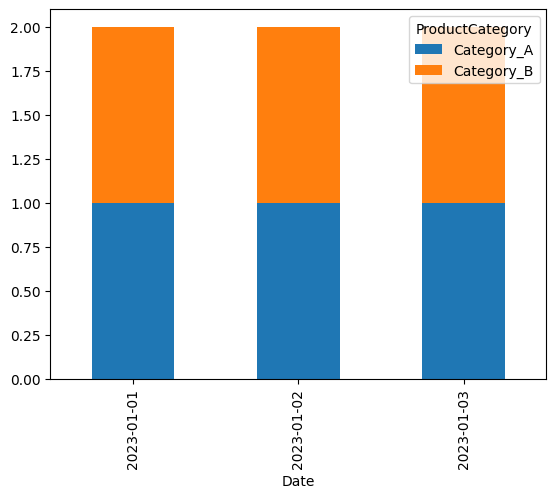

In [30]:
import pandas as pd 

def fun(file_path):
    df = pd.read_csv(file_path)
    df.pivot_table(index='Date', columns='ProductCategory', aggfunc='size').plot.bar(stacked=True)

if __name__ == "__main__":
    file_path = input("Enter file path: ") 
    fun(file_path)


In [35]:
import pandas as pd
from tabulate import tabulate

def calculate_statistics(file_path):
    # Read CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)

    # Calculate mean, median, and mode
    mean_score = df['Test Score'].mean()
    median_score = df['Test Score'].median()
    mode_scores = df['Test Score'].mode()

    # Display the results in a table
    results_table = pd.DataFrame({
        'Statistic': ['Mean', 'Median', 'Mode'],
        'Value': [mean_score, median_score, ', '.join(map(str, mode_scores))]
    })

    print(tabulate(results_table, headers='keys', tablefmt='outline', showindex=False))

if __name__ == "__main__":
    file_path = input("Enter the file path of the CSV file containing the student data: ")
    calculate_statistics(file_path)


+-------------+---------+
| Statistic   |   Value |
+=============+=========+
| Mean        |    83.5 |
| Median      |    85   |
| Mode        |    85   |
+-------------+---------+
